In [1]:
# Tracking a Nonstationary Problem, Exercise 2.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bandits(steps):
    """Generates 10-armed bandits with random walk."""
    values = np.random.normal(size = 10)
    
    for t in range(steps):
        bandit = np.random.normal(values)
        random_walk = np.random.normal(scale = 0.01, size = 10)
        values = values + random_walk
        yield bandit

In [4]:
def greedy(Q):
    """Picks most valuable action with random tiebreak."""
    best_choices = np.flatnonzero(Q == Q.max())
    greedy_choice = np.random.choice(best_choices)
    return greedy_choice

In [5]:
def random(Q):
    """Picks a random action."""
    all_choices = np.arange(Q.size)
    explore_choice = np.random.choice(all_choices)
    return explore_choice

In [6]:
def epsilon_greedy(Q, epsilon):
    """Picks a random action with epsilon probabilty. Greedy otherwise."""
    options = ['greedy', 'random']
    probabilities = [1 - epsilon, epsilon]
    choice = np.random.choice(options, p = probabilities)
    
    if choice == 'greedy':
        return greedy(Q)
    elif choice == 'random':
        return random(Q)

In [7]:
def run(runs, epsilon, alpha, steps = 10000):
    """Return average behavior given number of runs, epsilon and alpha."""
    rewards = np.zeros((runs, steps))

    for run in range(runs):
        Q = np.zeros(10)
        N = np.zeros(10)

        for t, bandit in enumerate(bandits(steps)):
            A = epsilon_greedy(Q, epsilon)
            R = bandit[A]
            
            if alpha:
                Q[A] = Q[A] + (alpha * (R - Q[A])) # constant step-size
            else:
                N[A] = N[A] + 1
                Q[A] = Q[A] + (R - Q[A]) / N[A] # sample-average
                
            rewards[run, t] = R

    avg_rewards = rewards.mean(axis = 0)
    return avg_rewards

First run complete.
Second run complete.


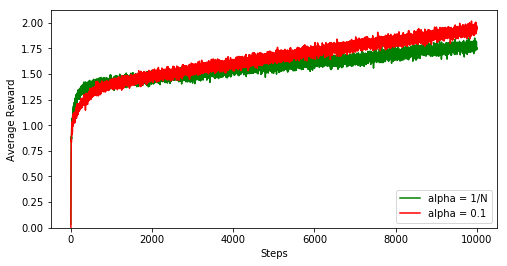

In [8]:
# running and plotting the results

runs = 2000

plt.figure(figsize = (8, 4))

first = run(runs, 0.1, alpha = None); print('First run complete.')
plt.plot(first, color = 'green', label = 'alpha = 1/N')

second = run(runs, 0.1, alpha = 0.1); print('Second run complete.')
plt.plot(second, color = 'red', label = 'alpha = 0.1')

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.ylim(bottom = 0)
plt.legend(loc = 4)

plt.show()